# Лабораторна робота №5
Суміщення зображень на основі використання дескрипторів

### Завдання
Вибрати з інтернету набори зображень з різною контрастністю і різним флуктуаціями освітленості. Для кожного зображення побудувати варіант спотвореного (видозміненого зображення). Для кожної отриманої пари побудувати дескриптор і проаналізувати можливість суміщення цих зображень і з визначення параметрів геметричних перетворень (кут повороту, зміщень в напрямку х і напрямку y).

### Варіант №5

5. A-KAZE

Для перевірки збігів необхідно написати власну функцію матчінгу, а результати її роботи перевірити засобами OpenCV. Якщо повної реалізації дескриптора не має в OpenCV, то такий необхідно створити власну функцію побудови цих дискрипторів. У цьому випадку матчінг можна здійснювати стандартними засобами (якщо це можливо).

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [67]:
img1 = cv2.imread("berries.jpeg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.rotate(img1[800:1300, 800:1300], cv2.ROTATE_90_CLOCKWISE)

In [86]:
def cv_bf_matcher(image: np.ndarray, query: np.ndarray, n_matches: int = 10) -> np.ndarray:
    akaze = cv2.AKAZE_create()

    kp1, des1 = akaze.detectAndCompute(image, None)
    kp2, des2 = akaze.detectAndCompute(query, None)

    # cv2.NORM_HAMMING for binary feature descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    img_matches = cv2.drawMatches(image, kp1, query, kp2, matches[:n_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
    return img_matches

In [100]:
def custom_matcher(
        image: np.ndarray,
        query: np.ndarray,
        threshold: float = 0.5,
        n_matches: int = 10
    ) -> np.ndarray:
    akaze = cv2.AKAZE_create()

    kp1, des1 = akaze.detectAndCompute(image, None)
    kp2, des2 = akaze.detectAndCompute(query, None)

    matches = []
    for i, d1 in enumerate(des1):
        distances = np.linalg.norm(d1-des2, axis=1)
        min_idx = np.argmin(distances)
        min_dist = distances[min_idx]
        if min_dist < threshold:
            matches.append(cv2.DMatch(i, min_idx, min_dist))

    matches = sorted(matches, key=lambda x: x.distance)
    img_matches = cv2.drawMatches(image, kp1, query, kp2, matches[:n_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
    return img_matches

In [89]:
def show_matches(matches: np.ndarray) -> None:
    plt.figure(figsize=(16, 10))
    plt.imshow(matches)
    plt.axis("off")
    plt.show()

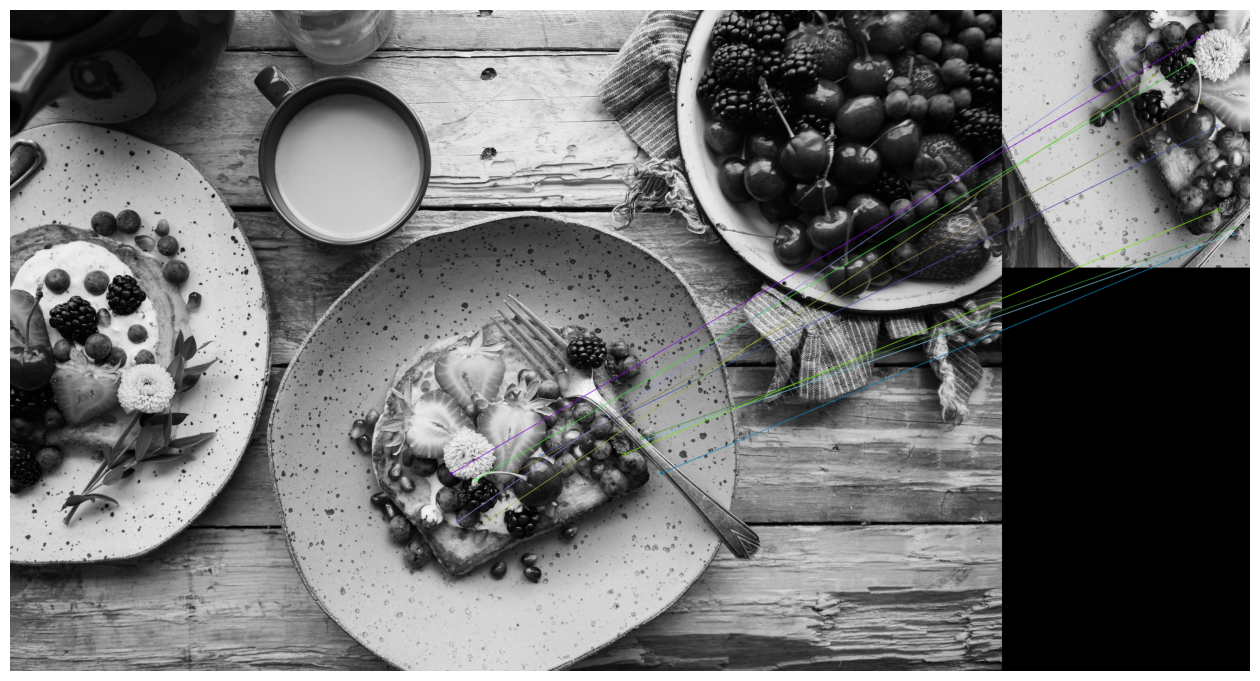

In [92]:
cv_matches = cv_bf_matcher(img1, img2)
show_matches(cv_matches)

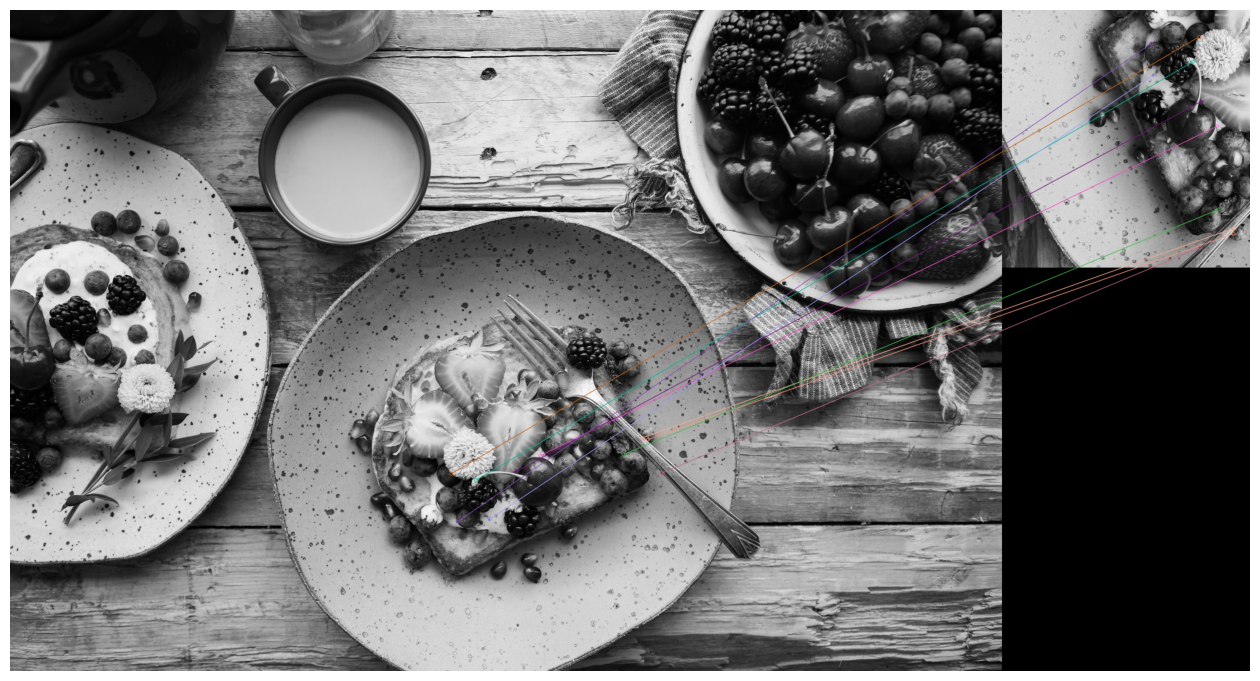

In [101]:
custom_matches = custom_matcher(img1, img2)
show_matches(custom_matches)

Додаткове завдання (оцінюється у додаткові бали) - в процесі порівняння дескрипторів використати власну реалізацію алгоритму RANSAC. Додаткові бали також надаються за написання власної функції побудови дексрипторів, без використання OpenCV.